<h1 align= 'center'>Analysis of NPV y IRR

In [3]:
import pandas as pd
import numpy as np
import numpy_financial as npf

# Simulamos un calindario of cashflows
cashflows = [-100000, 12000, 15000, 18000, 20000, 22000, 25000, 27000, 29000, 30000, 31000]
years = pd.date_range(start='2025', periods=len(cashflows), freq='YE')

# Crear DataFrame
df_cashflows = pd.DataFrame({
    'Date': years,
    'Cashflows': cashflows
})
df_cashflows

,Date,Cashflows
0,2025-12-31,-100000
1,2026-12-31,12000
2,2027-12-31,15000
3,2028-12-31,18000
4,2029-12-31,20000
5,2030-12-31,22000
6,2031-12-31,25000
7,2032-12-31,27000
8,2033-12-31,29000
9,2034-12-31,30000


In [4]:
rate_discount = 0.10  

# Adding 'Year' and 'Period' columns for the discount of cashflows

df_cashflows['Year'] = df_cashflows['Date'].dt.year
df_cashflows['Period'] = range(len(df_cashflows))

# NPV: NPV = Cashflow / (1 + r)^t

df_cashflows['NPV'] = df_cashflows['Cashflows'] / (1 + rate_discount) ** df_cashflows['Period']


In [5]:
df_cashflows

,Date,Cashflows,Year,Period,NPV
0,2025-12-31,-100000,2025,0,-100000.000000
1,2026-12-31,12000,2026,1,10909.090909
2,2027-12-31,15000,2027,2,12396.694215
3,2028-12-31,18000,2028,3,13523.666416
4,2029-12-31,20000,2029,4,13660.269107
5,2030-12-31,22000,2030,5,13660.269107
6,2031-12-31,25000,2031,6,14111.848251
7,2032-12-31,27000,2032,7,13855.269192
8,2033-12-31,29000,2033,8,13528.714026
9,2034-12-31,30000,2034,9,12722.928551


Cashflow graph

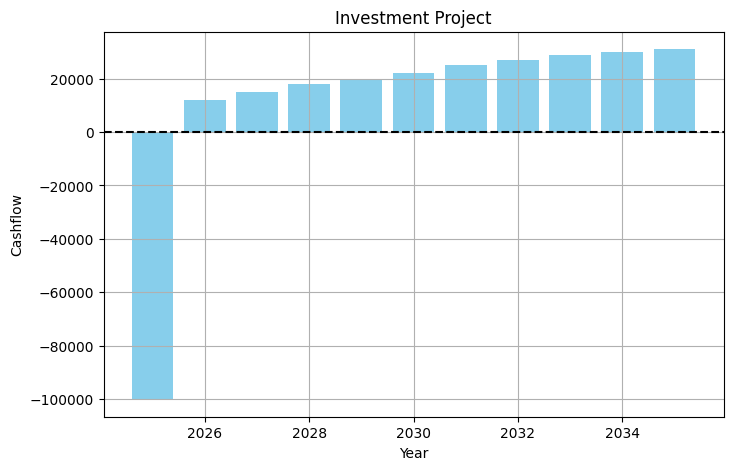

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df_cashflows['Year'], df_cashflows['Cashflows'], color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.title("Investment Project")
plt.xlabel("Year")
plt.ylabel("Cashflow")
plt.grid(True);

Analysis of NPV

In [9]:
NPV = df_cashflows['NPV'].sum()

if NPV >= 0:
    print(f"Project NPV: ${NPV:,.2f}. The Project is profitable")
else:
    print(f"Project NPV: ${NPV:,.2f}. The Project is not profitable")

Project NPV: $30,320.59. The Project is profitable


Analysis of IRR

In [10]:
IRR = npf.irr(df_cashflows['Cashflows'])
print(f"Project IRR: {IRR:.2%}")

Project IRR: 15.57%


Sensitivity Analysis

In [23]:
# Generating a range of possible rates from 0.05 to 0.2
rates = np.linspace(0.05, 0.2, 100)

# CAlculatinga list of possible NPV acording to the defined range of rates

npv_list = [sum(f / (1 + r)**i for i, f in enumerate(cashflows)) for r in rates]

# Locating the aproximate rate where NPV is close to 0
idx_irr_aprox = np.argmin(np.abs(npv_list)) # Obtiniindo el indice la irr ofl NPV con la 
                                            # Mínima distancia a 0 tomando el value absoluto of  todos los NPV posible

# Como cada eleminto of npv_list esta hehco in funcion of la rate ofntro of rates, 
# obtiner el indice of la lista of NPV con el value mas cercano a 0, 
# significa incontrar la rate of discount que permite obtiner ese result

irr_aprox = rates[idx_irr_aprox]

npv_irr = npv_list[idx_irr_aprox]


In [39]:
irr_aprox

0.15606060606060607

In [37]:
if npv_irr <= 0:
    irr_aprox = rates[idx_irr_aprox - 1]
    npv_irr = npv_list[idx_irr_aprox - 1]

In [40]:
print(f"Aproximate IRR that strikes the NPV balance (NPV = 0): {irr_aprox }")
display(f"NPV obtained according to the balance IRR: ${npv_irr:,.2f}")

Aproximate IRR that strikes the NPV balance (NPV = 0): 0.15606060606060607


'NPV obtained according to the balance IRR: $534.71'

Graph - NPV sensitivity to Discount Rate and Balance Point

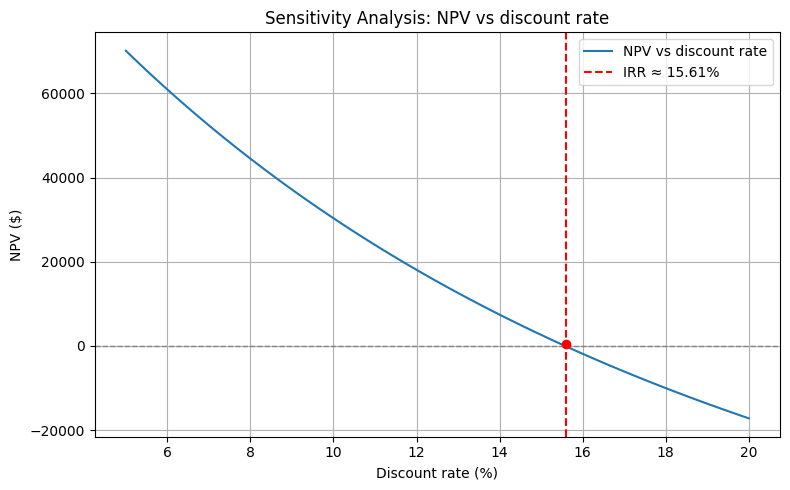

In [43]:

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(rates * 100, npv_list, label = 'NPV vs discount rate')

# Linea constante of NPV = 0
plt.axhline(0, color = 'gray', linestyle='--', linewidth = 1)

# Linea constante of  la IRR of equillibrio
plt.axvline(irr_aprox * 100, color='red', linestyle='--', label = f'IRR ≈ {irr_aprox*100:.2f}%')

# Punto of intersección
plt.plot(irr_aprox * 100, npv_irr, 'ro')

# Etiquetas
plt.title("Sensitivity Analysis: NPV vs discount rate")
plt.xlabel("Discount rate (%)")
plt.ylabel("NPV ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Payback Period

In [45]:
# Simple Payback

cashcumsum = np.cumsum(cashflows)
years_payback = np.argmax(cashcumsum >= 0) 

print(f"Payback time: {years_payback} years.")

Payback time: 6 years.


In [46]:
# Discounted Payback

rate = 0.10
cashflows_disc = [f / (1 + rate) ** i for i, f in enumerate(cashflows)]
acum_disc = np.cumsum(cashflows_disc)
years_payback_disc = np.argmax(acum_disc >= 0) # Obtaining the first index where the cumsum of the discounted cashflow is >= 0

print(f"Discounted Payback: {years_payback_disc} years.")

Discounted Payback: 8 years.


Scenario Analysis Optimista / Pesimista

In [49]:
cashflows_optimistic = [cashflows[0]] + [f * 1.2 for f in cashflows[1:]]
cashflows_pessimistic = [cashflows[0]] + [f * 0.8 for f in cashflows[1:]]

# NPV for every scenario using numpy_financial tools

npv_base = npf.npv(rate_discount, cashflows)
npv_optimistic = npf.npv(rate_discount, cashflows_optimistic)
npv_pessimistic = npf.npv(rate_discount, cashflows_pessimistic)

# IRR for every scenario
irr_base = npf.irr(cashflows)
irr_optimistic = npf.irr(cashflows_optimistic)
irr_pessimistic = npf.irr(cashflows_pessimistic)

# Creating DataFrame to sow the results
scenarios = pd.DataFrame({
    'Scenario': ['Pessimistic', 'Base', 'Optimistic'],
    'NPV': [npv_pessimistic, npv_base, npv_optimistic],
    'IRR': [irr_pessimistic, irr_base, irr_optimistic]
})

scenarios = pd.DataFrame(scenarios)

scenarios

,Scenario,NPV,IRR
0,Pessimistic,4256.473398,0.108339
1,Base,30320.591748,0.155737
2,Optimistic,56384.710098,0.198403
